<h1 style="text-align:center; color:#e64500ff;">Class 04 Statistical Summary</h1>

在作业部分，增加收益率groupby方法，绘制了理论、金融实践波动率对比图，在最后用ADF检验了年度、日收盘股价的平稳性，一只股票的价格是非平稳的

* 这项工作主要是让我们知道数据的整体状况怎么样，描述这个数据的“样子”。    
* 了解数据的概况，有助于后续的数据分析和挖掘  

✨**描述性统计的Python工具**✨

 - **样本数（Count）**：表明可用观测值的多少，样本越充分统计结果越稳健。
   - 公式：$n = \text{len}(r_1, r_2, ..., r_n)$
 - **均值（Mean）**：衡量收益率的中心位置。
   - 公式：$\mu = \frac{1}{n} \sum_{i=1}^n r_i$
 - **中位数（Median）**：将所有收益率从小到大排列后处于中间的值。
 - **标准差（Standard Deviation）**：刻画收益波动的强弱，是风险度量的基础。
   - 公式：$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (r_i - \mu)^2}$
 - **方差（Variance）**：标准差的平方，反映波动的离散程度。
   - 公式：$s^2 = \frac{1}{n-1} \sum_{i=1}^n (r_i - \mu)^2$
 - **分位数（Quantiles）**：如25%、50%、75%分位数，可帮助我们了解收益率在不同位置的取值及尾部风险。
   - 公式：$q_p = \text{第} \lceil np \rceil \text{小的数}$，$p$为分位点（如0.25, 0.5, 0.75）
 - **最小值与最大值（Min/Max）**：展示历史上出现过的极端收益。
   - 公式：$\min(r_1, ..., r_n)$，$\max(r_1, ..., r_n)$
 - **正收益比例（% Positive）**：统计收益率为正的比例，直观反映赚钱的频率。
   - 公式：$\text{正收益比例} = \frac{1}{n} \sum_{i=1}^n I(r_i > 0)$，其中$I(\cdot)$为指示函数
 - **偏度（Skewness）**：描述分布的不对称性，判断分布是否偏斜。
   - 公式：$\text{Skewness} = \frac{1}{n} \sum_{i=1}^n \left(\frac{r_i - \mu}{\sigma}\right)^3$
 - **峰度（Kurtosis）**：描述分布的尖峭程度，判断是否存在肥尾或极端事件风险。
   - 公式：$\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^n \left(\frac{r_i - \mu}{\sigma}\right)^4$
* cumsum 累计和  
* cumprod 累计乘积  
* diff 一阶差分  
* pct_change 计算百分数变化    
* mode 计算众数  
* cov 协方差           （衡量两个变量的总体误差）  
* corrcoef 相关系数   

In [216]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats # 统计模块
import scipy

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression ols回归用于建立一个或多个自变量与因变量之间线性关系模型

import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] #设置了中文字体支持
#plt.rcParams['font.family'] = 'Times New Roman'  所有文本使用英文字体 Times New Roman


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'
#设置列不限制数量
pd.set_option('display.max_columns', None)

In [217]:
data = pd.read_csv('./000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d') #更改Day列格式为XXXX-XX-XX
data.set_index('Day', inplace = True) #重建行索引为Day列
data.sort_values(by = ['Day'], ascending=True) #Day列升序排序

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [218]:
data_new = data['1995-01':'2025-08'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [219]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')  #另一种写法lambda x: np.prod(1+x)-1
Month_data.index.name = 'month'
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')
Quarter_data.index.name = 'quarter'
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')
Year_data.index.name = 'year'
Month_data
Quarter_data
Year_data


,Ret
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


,Ret
quarter,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2024-09-30,0.124383
2024-12-31,0.004575
2025-03-31,-0.004779


,Ret
year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [220]:
# 汇总日/月/年收益率的描述性统计指标
def summarize_returns(series):
    clean_series = series.dropna() #处理缺失值.dropna()删除包含任何缺失值的行
    return pd.Series({
        '样本数': clean_series.count(),
        '均值': clean_series.mean(),
        '中位数': clean_series.median(),
        '标准差': clean_series.std(),
        '方差': clean_series.var(),
        '最小值': clean_series.min(),
        '25%分位数': clean_series.quantile(0.25),
        '50%分位数': clean_series.quantile(0.5),
        '75%分位数': clean_series.quantile(0.75),
        '最大值': clean_series.max(),
        '正收益比例': (clean_series > 0).mean(),
        '偏度': clean_series.skew(),
        '峰度': clean_series.kurt()
    })

return_periods = {
    '日收益率': data_new.loc['2000-01':'2025-08', 'Raw_return'],  #.loc[]用于按行和列的标签来选择数据
    '月收益率': Month_data.loc['2000-01':'2025-08', 'Ret'],
    '年收益率': Year_data.loc['2000':'2025', 'Ret']
}
#创建汇总表
returns_summary = pd.DataFrame({
    name: summarize_returns(series) for name, series in return_periods.items() #通过循环形成月、季度、年的字典，name为键，经过函数汇总后的统计量为值
}).T  #.T: 转置 DataFrame，使名称作为行索引，统计量作为列
returns_summary['正收益比例'] = returns_summary['正收益比例'].mul(100)   #.mul()从小数格式转换为百分比格式（乘以100）
returns_summary.rename(columns={'正收益比例': '正收益比例(%)'}, inplace=True) #统计量乘100后修改列名加%
#保留几位小数
returns_summary = returns_summary.round({
    '样本数': 0,
    '均值': 5,
    '中位数': 5,
    '标准差': 5,
    '方差': 7,
    '最小值': 5,
    '25%分位数': 5,
    '50%分位数': 5,
    '75%分位数': 5,
    '最大值': 5,
    '正收益比例(%)': 2,
    '偏度': 3,
    '峰度': 3
})
returns_summary['样本数'] = returns_summary['样本数'].astype(int) #转换为整型
returns_summary

,样本数,均值,中位数,标准差,方差,最小值,25%分位数,50%分位数,75%分位数,最大值,正收益比例(%),偏度,峰度
日收益率,6219,0.00027,0.00051,0.01462,0.000214,-0.08841,-0.00615,0.00051,0.00700,0.09857,52.68,-0.212,5.631
月收益率,308,0.00582,0.00457,0.06979,0.004870,-0.24631,-0.03590,0.00457,0.04199,0.27446,54.22,-0.055,1.991
年收益率,26,0.10927,0.03985,0.41714,0.174006,-0.65394,-0.14922,0.03985,0.14793,1.30433,53.85,1.284,2.094


<font size="6" color=#87CEEB>均值 mean</font> 

In [221]:
round(data_new['2000-01':'2025-08']['Raw_return'].mean(),5) #求平均再保留5位小数

np.float64(0.00027)

In [222]:
np.mean(data_new['2000-01':'2025-08']['Raw_return'])

np.float64(0.0002740673718891408)

In [223]:
print('中国股票市场日度平均收益率为',data_new['2000-01':'2025-08']['Raw_return'].mean().round(5)*100,'%',sep=" ") #sep=" "分隔符

中国股票市场日度平均收益率为 0.027 %


In [224]:
mean_ret = Month_data.loc['2000-01':'2025-08', 'Ret'].mean()
print(f"中国股票市场月度平均收益率为{mean_ret*100:.4f}%")

中国股票市场月度平均收益率为0.5821%


In [225]:
print('中国股票市场年度平均收益率为',Year_data['2000':'2025']['Ret'].mean().round(4)*100,'%',sep="")

中国股票市场年度平均收益率为10.93%


In [226]:
sum(data_new['2000-01':'2025-08']['Raw_return']) / len(data_new['2000-01':'2025-08']['Raw_return'])

0.0002740673718891408

In [227]:
data_new['1995-01':'2025-08']['Raw_return'].describe()

count    7445.000000
mean        0.000372
std         0.016331
min        -0.163937
25%        -0.006607
50%         0.000496
75%         0.007503
max         0.309870
Name: Raw_return, dtype: float64

<font size="6" color=#87CEEB>分位数 quantile</font>

- 中位数 Median
  - 当N是奇数时
    - $$m_{0.5}=X_{(N+1) / 2}$$
  - 当N是偶数时
    - $$m_{0.5}=\frac{X_{(N / 2)}+X_{(N / 2+1)}}{2}$$
- 10分位数 常用在股票投资策略中

In [228]:
len(data_new['1995-01':'2025-08'])

7445

In [229]:
len(data_new[data_new["Raw_return"] > 0])

3903

In [230]:
len(data_new[data_new["Raw_return"] > 0])/len(data_new)

0.5242444593687038

In [231]:
from statistics import quantiles

# quantiles函数里面的参数需要注意
# 计算data_new在1995-01到2025-08期间Raw_return的十分位数
# n=10 表示分成10份（十分位数），method='exclusive' 表示使用不包含端点的分位数计算方法
quantiles(data_new['1995-01':'2025-08']['Raw_return'], n = 10, method='exclusive')

[-0.016149825200764644,
 -0.008725465267893506,
 -0.004824058860378355,
 -0.001823562879049323,
 0.000496269119653947,
 0.0028404410444615724,
 0.005705730958616373,
 0.009680619902095611,
 0.016938708022350025]

In [232]:
quantiles(data_new['1995-01':'2025-08']['Raw_return'], n = 10, method='inclusive') # 在金融里，比如构造分位数组合（5分位、10分位），常用的还是 inclusive（更贴近排序分组）包含端点的分位数计算方法

[-0.01613595678615203,
 -0.008725111630471427,
 -0.004822137623838074,
 -0.0018234851297103782,
 0.000496269119653947,
 0.0028392511949331123,
 0.0057041773674745945,
 0.009673060232742569,
 0.01693011693950819]

In [233]:
max(Month_data['2000-01':'2025-08']['Ret']) #最大收益率

0.2744642236184609

In [234]:
min(Month_data['2000-01':'2025-08']['Ret'])  #最小收益率

-0.2463139446677537

In [235]:
quantiles(Month_data['1995-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.07275859939933171,
 -0.04791044569180978,
 -0.026743591620732254,
 -0.007438510711914969,
 0.004471851221674816,
 0.020382622493721046,
 0.03630346419175008,
 0.05424194628329713,
 0.10003790772865565]

In [236]:
import statistics
help(statistics.quantiles) #函数用于将数据分成多个等概率的区间，返回指定分位点的值。

Help on function quantiles in module statistics:

quantiles(data, *, n=4, method='exclusive')
    Divide *data* into *n* continuous intervals with equal probability.

    Returns a list of (n - 1) cut points separating the intervals.

    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.

    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.

    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.



In [237]:
#四分位数，exclusive不包含端点，n+1尺度，k分位数（pos位置）=（n+1）/k  该例子中n=10，k=4
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
q = statistics.quantiles(data, n=4, method='exclusive')
print(q)

[2.75, 5.5, 8.25]


In [238]:
#inclusive，（n-1）/k +1
q = statistics.quantiles(data, n=4, method='inclusive')
print(q)

[3.25, 5.5, 7.75]


In [239]:
Month_data['2000-01':'2025-08']['Ret'].describe()

count    308.000000
mean       0.005821
std        0.069785
min       -0.246314
25%       -0.035898
50%        0.004569
75%        0.041993
max        0.274464
Name: Ret, dtype: float64

In [240]:
 #包含端点月收益率十分位数
statistics.quantiles(Month_data['Ret'], n = 10, method='inclusive')

[-0.0709964521333589,
 -0.047737015530115404,
 -0.026630590375295526,
 -0.007411841595713531,
 0.004471851221674816,
 0.020217863557133686,
 0.03625761917881416,
 0.05352850908377551,
 0.09697370519393292]

In [241]:
 #正收益率
len(Month_data['1995-01':'2025-08'][Month_data["Ret"] > 0])/len(Month_data['1995-01':'2025-08'])

0.532608695652174

In [242]:
#不包含端点月收益率十分位数
quantiles(Month_data['2000-01':'2025-08']['Ret'], n = 10, method='exclusive') 

[-0.06407330856971007,
 -0.04690477004328284,
 -0.02294678764968542,
 -0.006030700018074264,
 0.004568893904690174,
 0.018850177397894186,
 0.03537258283387652,
 0.05187838634791797,
 0.08409364977091105]

In [243]:
seq = np.linspace(0,1,11) #定义分位数序列，为后面准备
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [244]:
np.quantile(data_new['2000-01':'2025-08']['Raw_return'],q=seq)

array([-0.08840689, -0.01519968, -0.00818603, -0.00456702, -0.00171305,
        0.00050629,  0.00269577,  0.00535259,  0.00898871,  0.01584495,
        0.09856839])

<font size="6" color=#87CEEB>波动率 Variance<font>

In [245]:
#计算方差
np.var(data_new['2000-01':'2025-08']['Raw_return'])

np.float64(0.00021377999633570064)

In [246]:
#手动使用 n-1 作为无偏估计量计算方差
m = np.mean(data_new['2000-01':'2025-08']['Raw_return'])
sum((data_new['2000-01':'2025-08']['Raw_return'] - m)**2) / (len(data_new['2000-01':'2025-08']['Raw_return'])-1)

0.00021381437716496018

In [247]:
#计算标准差
np.std(data_new['2000-01':'2025-08']['Raw_return'])

np.float64(0.014621217334261215)

In [248]:
#方差开平方根
np.sqrt(np.var(data_new['2000-01':'2025-08']['Raw_return']))

np.float64(0.014621217334261215)

In [249]:
from math import sqrt

sqrt(np.var(data_new['2000-01':'2024-09']['Raw_return']))

0.014732982591047728

## 作业

In [250]:
#计算每个月的波动率resample方法，波动率也就是方差。
#这是基于统计学的方法，按理论的方差计算
monthly_var = data_new.resample('ME')['Raw_return'].var().to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2025-04-30,0.000304
2025-05-31,0.000032
2025-06-30,0.000030


In [251]:
# 方法2：groupby计算每月的方差
#这也是基于统计学的方法，按理论的方差计算
monthly_var = data_new.groupby([data_new.index.year, data_new.index.month])['Raw_return'].var().to_frame(name='variance')
monthly_var.index.names = ['Year', 'Month']
monthly_var

variance
Year Month          
1995 1      0.000260
     2      0.001130
     3      0.000551
     4      0.000407
     5      0.006924
...              ...
2025 4      0.000304
     5      0.000032
     6      0.000030
     7      0.000018
     8      0.000056

[368 rows x 1 columns]

In [252]:
#基于金融实践计算的波动率，全是-0.1波动率其实很大，风险很大，以0为标准，若用理论则无风险，符合实际
monthly_var = data_new.resample('ME')['Raw_return'].apply(lambda x: np.sum(x ** 2)).to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2025-04-30,0.006097
2025-05-31,0.000602
2025-06-30,0.000609


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, '波动率计算方法对比: 理论方差 vs 金融实践')

Text(0.5, 0, '月份')

Text(0, 0.5, '波动率')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

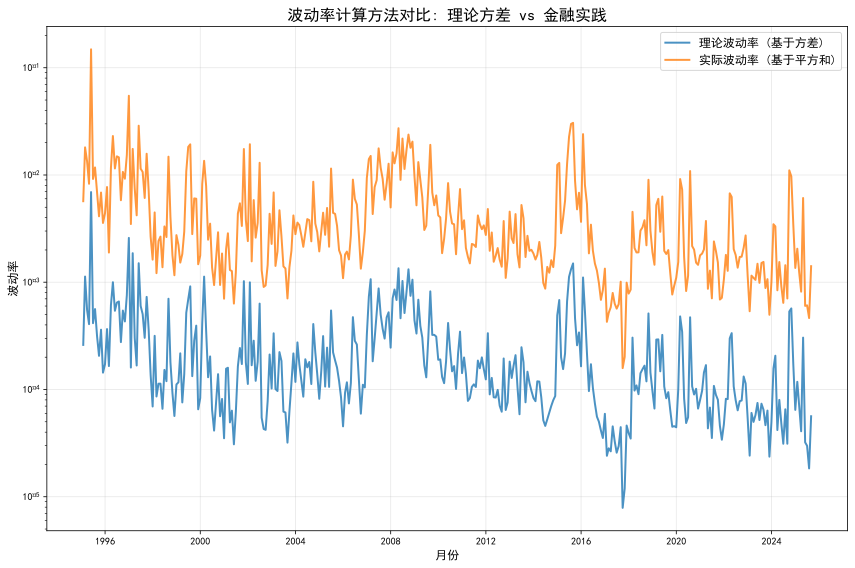

Text(0.5, 0, '月份')

Text(0, 0.5, '理论波动率')

Text(0, 0.5, '实际波动率')

Text(0.5, 1.0, '波动率计算方法对比 (双Y轴)')

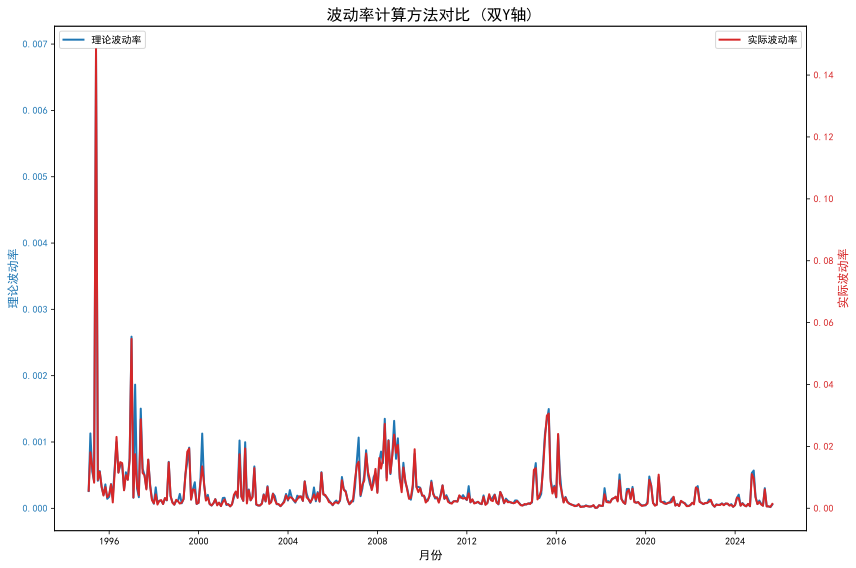

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# 计算理论波动率（基于统计学方差）
monthly_var_theoretical = data_new.resample('ME')['Raw_return'].var().to_frame(name = 'variance')
monthly_var_theoretical.index.name = 'month'

# 计算实际波动率（基于金融实践）
monthly_var_practical = data_new.resample('ME')['Raw_return'].apply(lambda x: np.sum(x ** 2)).to_frame(name = 'variance')
monthly_var_practical.index.name = 'month'

# 创建图表
plt.figure(figsize=(12, 8))

# 绘制理论波动率曲线
plt.plot(monthly_var_theoretical.index, monthly_var_theoretical['variance'], 
         label='理论波动率 (基于方差)', linewidth=2, alpha=0.8)

# 绘制实际波动率曲线
plt.plot(monthly_var_practical.index, monthly_var_practical['variance'], 
         label='实际波动率 (基于平方和)', linewidth=2, alpha=0.8)

# 设置图表属性
plt.title('波动率计算方法对比: 理论方差 vs 金融实践', fontsize=16, fontweight='bold')
plt.xlabel('月份', fontsize=12)
plt.ylabel('波动率', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# 由于数值范围差异较大，使用对数坐标更清晰
plt.yscale('log')
plt.tight_layout()
plt.show()

# 创建了一个双Y轴图表来更清晰地显示差异
fig, ax1 = plt.subplots(figsize=(12, 8))

# 左侧Y轴 - 理论波动率
color = 'tab:blue'
ax1.set_xlabel('月份', fontsize=12)
ax1.set_ylabel('理论波动率', color=color, fontsize=12)
ax1.plot(monthly_var_theoretical.index, monthly_var_theoretical['variance'], 
         color=color, label='理论波动率', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 右侧Y轴 - 实际波动率
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('实际波动率', color=color, fontsize=12)
ax2.plot(monthly_var_practical.index, monthly_var_practical['variance'], 
         color=color, label='实际波动率', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')


plt.title('波动率计算方法对比 (双Y轴)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


<font size="6" color=#87CEEB>正态分布（Normal Distribution）<font>

C:\Users\user\AppData\Local\Temp\ipykernel_14428\2411182385.py:81: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整布局，为大标题留出空间
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


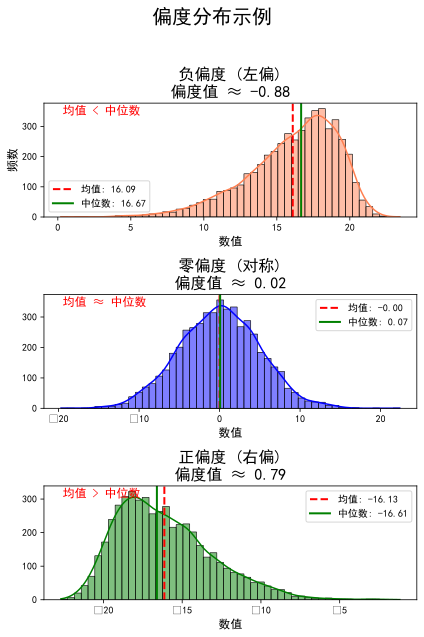

In [254]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, skew
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定字体为SimHei（黑体）
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同偏度的数据 ---
np.random.seed(42) # 设置随机种子，保证每次运行结果一致
n_samples = 5000   # 样本数量

# 生成负偏度数据 (左偏)
# a < 0 会产生负偏度
data_neg = skewnorm.rvs(a=-5, loc=20, scale=5, size=n_samples)
skew_neg = skew(data_neg)

# 生成零偏度数据 (对称分布，接近正态分布)
# a = 0 时，skewnorm生成的就是正态分布
data_zero = skewnorm.rvs(a=0, loc=0, scale=5, size=n_samples)
skew_zero = skew(data_zero)

# 生成正偏度数据 (右偏)
# a > 0 会产生正偏度
data_pos = skewnorm.rvs(a=5, loc=-20, scale=5, size=n_samples)
skew_pos = skew(data_pos)

# --- 2. 可视化 ---
# 创建一个1行3列的图，用于并排展示三个分布
fig, axes = plt.subplots(3,1, figsize=(6, 9))
fig.suptitle('偏度分布示例', fontsize=20)


# (1) 绘制负偏度分布图
sns.histplot(data_neg, kde=True, ax=axes[0], color='coral', bins=50)
axes[0].set_title(f'负偏度 (左偏)\n偏度值 ≈ {skew_neg:.2f}', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
# 标出均值和中位数的位置，帮助理解偏度对它们的影响
mean_neg = np.mean(data_neg)
median_neg = np.median(data_neg)
axes[0].axvline(mean_neg, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_neg:.2f}')
axes[0].axvline(median_neg, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_neg:.2f}')
axes[0].legend()
axes[0].text(0.05, 0.9, '均值 < 中位数', transform=axes[0].transAxes, fontsize=12, color='red')


# (2) 绘制零偏度分布图
sns.histplot(data_zero, kde=True, ax=axes[1], color='blue', bins=50)
axes[1].set_title(f'零偏度 (对称)\n偏度值 ≈ {skew_zero:.2f}', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('') # 中间的图不显示y轴标签，避免拥挤
mean_zero = np.mean(data_zero)
median_zero = np.median(data_zero)
axes[1].axvline(mean_zero, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_zero:.2f}')
axes[1].axvline(median_zero, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_zero:.2f}')
axes[1].legend()
axes[1].text(0.05, 0.9, '均值 ≈ 中位数', transform=axes[1].transAxes, fontsize=12, color='red')


# (3) 绘制正偏度分布图
sns.histplot(data_pos, kde=True, ax=axes[2], color='green', bins=50)
axes[2].set_title(f'正偏度 (右偏)\n偏度值 ≈ {skew_pos:.2f}', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
mean_pos = np.mean(data_pos)
median_pos = np.median(data_pos)
axes[2].axvline(mean_pos, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_pos:.2f}')
axes[2].axvline(median_pos, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_pos:.2f}')
axes[2].legend()
axes[2].text(0.05, 0.9, '均值 > 中位数', transform=axes[2].transAxes, fontsize=12, color='red')


# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整布局，为大标题留出空间
plt.show();

C:\Users\user\AppData\Local\Temp\ipykernel_14428\2202246861.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


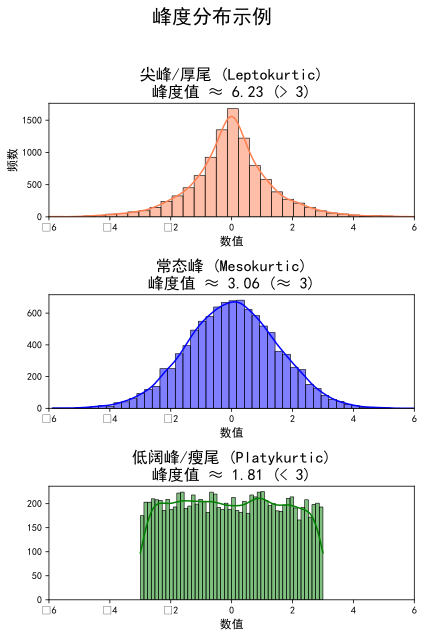

In [255]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm, laplace, uniform
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定字体为SimHei（黑体）
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同峰度的数据 ---
np.random.seed(42)
n_samples = 10000

# 生成尖峰/厚尾数据 (Leptokurtic)
# 拉普拉斯分布是典型的尖峰厚尾分布
data_lepto = laplace.rvs(loc=0, scale=1, size=n_samples)
# 使用 fisher=False 计算原始峰度值，此时正态分布的峰度为3
kurt_lepto = kurtosis(data_lepto, fisher=False)

# 生成常态峰数据 (Mesokurtic)
# 正态分布
data_meso = norm.rvs(loc=0, scale=1.5, size=n_samples) # 调整scale使视觉效果更清晰
kurt_meso = kurtosis(data_meso, fisher=False)

# 生成低阔峰/瘦尾数据 (Platykurtic)
# 均匀分布是典型的低阔峰
data_platy = uniform.rvs(loc=-3, scale=6, size=n_samples) # 范围从-3到3
kurt_platy = kurtosis(data_platy, fisher=False)

# --- 2. 可视化 ---
fig, axes = plt.subplots(3, 1, figsize=(6, 9))
fig.suptitle('峰度分布示例', fontsize=20)
common_xlim = (-6, 6) # 设置统一的x轴范围，便于比较

# (1) 绘制尖峰/厚尾分布
sns.histplot(data_lepto, kde=True, ax=axes[0], color='coral', bins=50)
axes[0].set_title(f'尖峰/厚尾 (Leptokurtic)\n峰度值 ≈ {kurt_lepto:.2f} (> 3)', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
axes[0].set_xlim(common_xlim)

# (2) 绘制常态峰分布
sns.histplot(data_meso, kde=True, ax=axes[1], color='blue', bins=50)
axes[1].set_title(f'常态峰 (Mesokurtic)\n峰度值 ≈ {kurt_meso:.2f} (≈ 3)', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(common_xlim)

# (3) 绘制低阔峰/瘦尾分布
sns.histplot(data_platy, kde=True, ax=axes[2], color='green', bins=50)
axes[2].set_title(f'低阔峰/瘦尾 (Platykurtic)\n峰度值 ≈ {kurt_platy:.2f} (< 3)', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
axes[2].set_xlim(common_xlim)

# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

In [256]:
#超额峰度
len(data_new['1995-01':'2025-08'])#长度
data_new['1995-01':'2025-08']['Raw_return'].skew()#偏度
data_new['1995-01':'2025-08']['Raw_return'].kurt()#峰度
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=False) - 3
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=True)

7445

np.float64(0.6772796464034425)

np.float64(23.63802106137419)

np.float64(23.621343146464902)

np.float64(23.621343146464902)

- 结果 > 0：尖峰肥尾  
- 结果 = 0：与正态分布相似  
- 结果 < 0：低峰瘦尾  
- 正峰度：出现极端收益/损失的概率高于正态分布预期  

- 负峰度：收益率分布比正态分布更集中，极端值较少


In [257]:
#超额峰度的手动计算方法
m = np.mean(data_new['1995-01':'2024-09']['Raw_return'])
l = len(data_new['1995-01':'2024-09']['Raw_return'])
sum(((data_new['1995-01':'2024-09']['Raw_return'] - m)/np.std(data_new['1995-01':'2024-09']['Raw_return']))**4) / l -3

23.455144815692737

In [258]:
# 月度偏度和峰度
Month_data['1995-01':'2025-08']['Ret'].skew()
Month_data['1995-01':'2025-08']['Ret'].kurt()

np.float64(0.3266812712820461)

np.float64(2.0120324549166306)

In [259]:
# 季度偏度和峰度
Quarter_data['1995-01':'2024-09']['Ret'].skew()
Quarter_data['1995-01':'2024-09']['Ret'].kurt()

np.float64(0.8675024485714982)

np.float64(1.7137615374448099)

<font size="6" color=#87CEEB>标准正态分布的直方图<font>

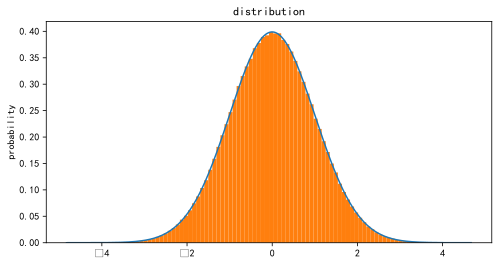

In [260]:
# 根据均值、标准差,求指定范围的正态分布概率值

'''"
normfun(x, mu, sigma) 函数定义了一个正态分布的概率密度函数，
其中 x 是自变量
mu 是均值
sigma 是标准差
这个函数计算了在给定均值和标准差下 x 处的概率密度值。
'''

def normfun(x, mu, sigma):
  pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
  return pdf


# 生成高斯分布的概率密度随机数
result = np.random.normal(0, 1, 1000000) # mean 0 and standard deviation 1

# np.arange()
# 函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1。
# 参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

x = np.arange(min(result), max(result),0.01)

# 设定 y 轴，载入刚才的正态分布函数
y = normfun(x, result.mean(), result.std())

# 修改画图的大小
plt.figure(figsize=(8, 4)) # 设置图形大小为宽10英寸，高6英寸
plt.plot(x, y) # 这里画出理论的正态分布概率曲线
 
# 这里画出实际的参数概率与取值关系
fig = plt.hist(result, bins=100, rwidth=1, density=True) # bins=100 表示将数据分成100个柱状图，density=True 表示将频率转换为概率密度。宽度是rwidth(0~1),=1没有缝隙
plt.title('distribution')
plt.xlabel('')
plt.ylabel('probability')
# 输出
plt.show(); # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷,这里指截取了数据最小值到最大值的分布

<font size="6" color=#87CEEB>在日收益率直方图上添加正态分布密度曲线<font>

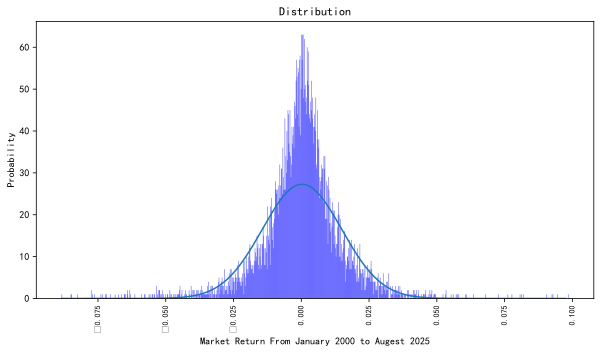

In [261]:
retmean = data_new['2000-01':'2025-08']['Raw_return'].mean()
retstd = data_new['2000-01':'2025-08']['Raw_return'].std()
retmin = data_new['2000-01':'2025-08']['Raw_return'].min()
retmax = data_new['2000-01':'2025-08']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)

fig = plt.hist(data_new['2000-01':'2025-08']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='b',
               alpha=0.7)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to Augest 2025')
plt.ylabel('Probability')
plt.show();

<font size="6" color=#87CEEB>在月收益率直方图上添加正态分布密度曲线<font>

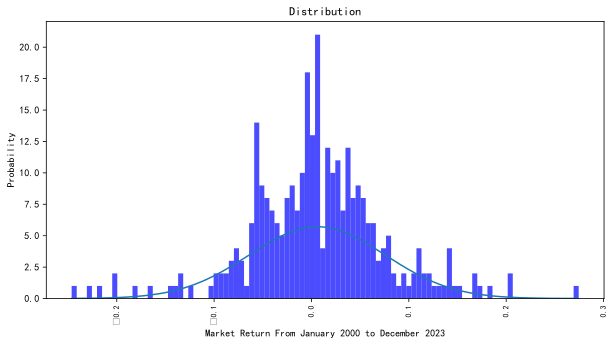

In [262]:
retmean = Month_data['2000-01':'2025-08']['Ret'].mean()
retstd = Month_data['2000-01':'2025-08']['Ret'].std()
retmin = Month_data['2000-01':'2025-08']['Ret'].min()
retmax = Month_data['2000-01':'2025-08']['Ret'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001)
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5)) # 图片大小 10，5
plt.plot(x, y)

fig = plt.hist(Month_data['2000-01':'2025-08']['Ret'],
               bins=100,
               histtype='bar',
               color='b',
               alpha=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to December 2023')
plt.ylabel('Probability')
plt.show();

<font size="6" color=#87CEEB>平稳性 stationary </font>   

### 为什么平稳性在金融时间序列中如此重要？
#### 1. 它是模型有效性的前提
许多经典的计量经济学模型，比如自回归模型（AR）、移动平均模型（MA）以及ARMA模型，都要求输入的数据是平稳的。这些模型的核心思想是，利用序列过去的行为和误差项来预测未来。如果序列的均值和方差等统计特性一直在变，那么基于历史数据估计出的模型参数就会不稳定，甚至毫无意义，无法用于未来的预测。

#### 2. 它是有效预测的基础
我们的目标是预测未来。如果一个时间序列是非平稳的，意味着它的行为模式在不断改变。比如一个公司的销售额，如果存在持续的增长趋势（均值不断变大），那么用过去十年的平均销售额来预测下个月的销售额，显然是荒谬的。只有当序列平稳时，我们才能假设“历史会在一定程度上重演”，过去的统计规律（如均值、波动性）在未来依然适用，从而让我们的预测有据可依。

#### 3. 它可以帮助我们避免“伪回归”（Spurious Regression）的陷阱
这是金融实证研究中最著名、也最危险的陷阱之一，也是对本科生最直观的警示。

**真实的金融事实说明**：
想象一下，你收集了两个毫不相关的时间序列数据：1990年到2020年“美国的名义GDP”和“马来西亚的棕榈油产量”。这两个序列很可能都是非平稳的，因为它们都随着经济发展和技术进步表现出明显的上升趋势。

如果你直接将这两个非平稳序列进行回归分析，比如 `GDP = a + b * PalmOil + e`，你很可能会得到一个**极其“漂亮”**的结果：
*   **很高的R²值**（比如0.9以上），显示模型解释力超强。
*   **非常显著的t统计量**，显示棕榈油产量对GDP有显著的解释能力。

看到这样的结果，你可能会兴奋地得出结论：“马来西亚的棕榈油产量是驱动美国GDP增长的关键因素！” 这显然是荒谬的。这种看似显著的统计关系其实是虚假的，它仅仅是因为两个序列共享了相似的时间趋势（都在增长），而并非存在任何真实的经济联系。这就是“伪回归”。

**如何解决？**
这个问题的根源在于序列的非平稳性。在金融实践中，我们通常不会直接对股价或GDP这样的水平值（Level）建模。我们会先对其进行**差分（Differencing）**处理，将其转换为平稳序列。

*   **股价 vs. 股票收益率**：股价（Price）是非平稳的，但它的对数差分，也就是我们常说的**对数收益率**（Log Return），通常是平稳的。股票收益率序列的均值会稳定地围绕一个小的正数波动，其方差也相对稳定。
*   **GDP vs. GDP增长率**：GDP总量是非平稳的，但GDP的同比增长率或环比增长率通常是平稳的。

通过对数据进行差分等变换，我们把非平稳的序列变成了平稳的序列。然后，我们再用平稳的收益率或增长率序列去构建模型和进行回归分析，这样得出的结论才是统计上可靠的，避免了伪回归的谬误。



In [263]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对月收益率数据进行ADF检验,用于判断一个时间序列是否是平稳的
adf_result = ADF(Month_data['2000-01':'2025-08']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -5.3910
p-value: 0.0000
Critical Values:
   1%: -3.4529
   5%: -2.8715
   10%: -2.5721
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [ ]:
from statsmodels.tsa.stattools import adfuller as ADF
adf_result = ADF(Quarter_data['2000':'2025']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -5.6533
p-value: 0.0000
Critical Values:
   1%: -3.4989
   5%: -2.8915
   10%: -2.5828
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [ ]:
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
adf_result = ADF(Year_data['2000':'2025']['Ret'])
print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}') 
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -4.6725
p-value: 0.0001
Critical Values:
   1%: -3.9240
   5%: -3.0685
   10%: -2.6739
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [ ]:
#一支股票的价格是非平稳的
adf_result = ADF(data_new['2000':'2025']['Close'])
print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}') 
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -2.2358
p-value: 0.1935
Critical Values:
   1%: -3.4314
   5%: -2.8620
   10%: -2.5670
结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。
